In [1]:
import numpy as np
from astropy import constants as c
import matplotlib.pyplot as plt # type: ignore
plt.rcParams["font.family"] = "sans-serif"
import math as mth
import pandas as pd
import seaborn as sns
sns.set_style("white")
#from allplanets import all_planets

In [2]:
# some useful constants in cgs
year = 365.25*24*3600   #in seconds
au = c.au.cgs.value
MS = c.M_sun.cgs.value      #mass of the sun in cgs
ME = c.M_earth.cgs.value    #mass of the earth in cgs
k_b = c.k_B.cgs.value       #boltzmann const
m_p = c.m_p.cgs.value       #mass of proton
Grav = c.G.cgs.value        #gravitational const
au = c.au.cgs.value     

ZS=0.012                    #metallicity of the sun
RS=6957.e10                #Radius of sun in cm

In [3]:
df=pd.read_csv("C:\\Users\\Dell\\OneDrive\\Documents\\IISERM\\INTERNSHIPS\\Joanna Drazkowska\\with_errors.csv"
               ,index_col=False)

df2 = df.drop_duplicates(subset=["Planet Name"], keep='first')
col_names=df2.columns.values.tolist()
for i in col_names:
    df2.dropna(subset=[i], inplace=True)


MStar_list=df2["mass of star (solar masses)"].values.tolist()        #in terms of solar masses
location_array=df2["semi major axis (au)"].values.tolist()           #in terms of au
Rstar_array=df2["radius of star (solar radius)"].values.tolist()
Metallicity=df2["metallicity = log(k)*metallicity of sun"].values.tolist()           #Making a list of all themetallicity values

<ipython-input-3-7d62742c61a2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(subset=[i], inplace=True)


In [4]:
Metal=np.load("Metallicity_full.npy")
isol=np.load("isol_full.npy")
#print((Metal[1,3]))
#print(isol)

In [5]:
Metallicity_normal=[]
for i in range(0,len(Metallicity)):
    Metallicity_normal.append(round(((10**(Metallicity[i]))*ZS),8))

In [6]:
print(Metallicity_normal[0:30])
print(Metal[0][9][0:30])

[0.01172685, 0.01285823, 0.00792832, 0.01094413, 0.00561282, 0.01315774, 0.01901872, 0.01656461, 0.00998117, 0.01132873, 0.01581908, 0.01094413, 0.01476323, 0.01045156, 0.02945651, 0.01145991, 0.0185858, 0.01172685, 0.01315774, 0.02686465, 0.01545899, 0.02234505, 0.0185858, 0.01256554, 0.02158645, 0.01545899, 0.02234505, 0.00849535, 0.01581908, 0.02749041]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.02945651 0.01145991 0.0185858  0.01172685
 0.         0.         0.01545899 0.02234505 0.         0.01256554
 0.         0.01545899 0.         0.00849535 0.01581908 0.        ]


In [7]:
#print(max(Metallicity))

counts2=0
Z_bins=np.linspace(min(Metallicity_normal),max(Metallicity_normal), 10)
counts2,bins2=np.histogram(Metallicity_normal,bins=Z_bins)
Z_bins
counts2

array([ 51, 168, 211, 179,  95,  60,  20,  11,   3], dtype=int64)

(array([ 51., 168., 211., 179.,  95.,  60.,  20.,  11.,   3.]),
 array([0.00268647, 0.00682343, 0.0109604 , 0.01509736, 0.01923433,
        0.02337129, 0.02750826, 0.03164522, 0.03578219, 0.03991915]),
 <a list of 9 Patch objects>)

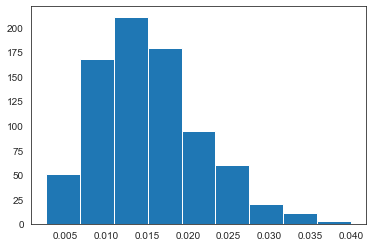

In [8]:
plt.hist(bins2[:-1],bins2,weights=counts2)

In [9]:
isol

array([[697., 727., 731., 733., 731., 729., 730., 729., 728., 727.],
       [202., 597., 686., 720., 724., 725., 726., 727., 724., 723.],
       [  0.,  21., 169., 354., 487., 582., 623., 655., 676., 694.],
       [  0.,   0.,   0.,   0.,   4.,  15.,  38.,  72., 137., 205.]])

[ 24 136 189 170  89  56  19  11   3]
[0.00475495 0.00889192 0.01302888 0.01716585 0.02130281 0.02543977
 0.02957674 0.0337137  0.03785067]
[ 51 168 211 179  95  60  20  11   3]


Text(0.5, 1.0, '$\\alpha$ = $10^{-4}$; $V_{frag}$=100cm/s')

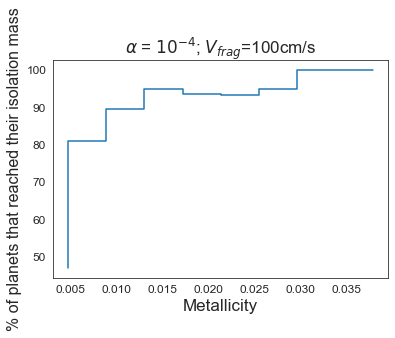

In [10]:
#X=np.linspace(min(Metallicity,))   
plt.rcParams['font.size'] = '12'

temp=[]
temp=Metal[0][0]
#print(len(temp))
#print(temp)
temp=temp[np.nonzero(temp)]
counts,bins= np.histogram(temp,bins=Z_bins)
#print(counts[0:28]/counts2[0:28])
#binsplot = bins[0:28]
#plt.hist(Z_bins[0:28],Z_bins[0:28],weights=counts[0:28]*100/counts2[0:28])
zcents=0.5*(Z_bins[1:]+Z_bins[:-1])

#Y=np.isfinite(counts*100/counts2)
print((counts))
#plt.semilogx
print((zcents))
print((counts2))
plt.step(zcents,counts*100/counts2)
plt.ylabel("% of planets that reached their isolation mass", fontsize=16)
plt.xlabel("Metallicity", fontsize=17)
#plt.grid()
#plt.ylim(0,130)
plt.title(r"$\alpha$ = $10^{-4}$; $V_{frag}$=100cm/s", fontsize=17)

Text(0.5, 1.0, '$\\alpha$ = $10^{-4}$; $V_{frag}$=400cm/s')

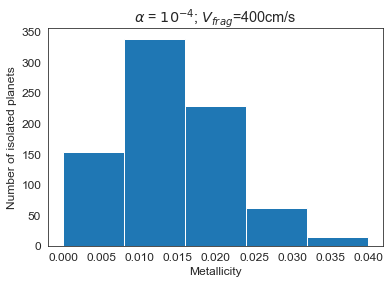

In [11]:
temp=Metal[1][3]
#print((temp))
plt.hist(temp,5)
plt.ylabel("Number of isolated planets")
plt.xlabel("Metallicity")
plt.title(r"$\alpha$ = $10^{-4}$; $V_{frag}$=400cm/s")

AttributeError: 'PathCollection' object has no property 'marginal_ticks'

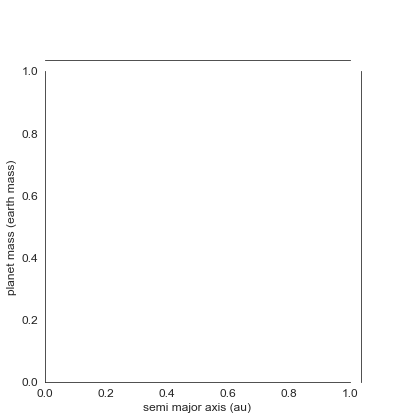

In [12]:
g=sns.jointplot(data=df2, x="semi major axis (au)", y="planet mass (earth mass)", color="blue", s=8, marginal_ticks=True )
#sns.scatterplot(data=df2, x="metallicity = log(k)*metallicity of sun", y="mass of star (solar masses)")

plt.ylabel(r"Mass of planets [$M_\oplus$]")
plt.xlabel(r"Position of planets (relative to their parent stars) [au]")
plt.yscale("log")
plt.xscale("log")


In [ ]:
temp_nz = Metal[1][2]
#print(np.size(Metal[0][9]) - np.size(temp_nz[np.nonzero(temp_nz)]))
#print(np.size(temp_nz[np.nonzero(temp_nz)]))

np.sum(counts)

654

In [ ]:
isol


array([[467., 655., 701., 724., 738., 746., 752., 757., 751., 742.],
       [  0.,  41., 413., 603., 696., 736., 753., 755., 745., 726.],
       [  0.,   0.,   0.,   0.,   6.,  28.,  79., 165., 343., 468.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

# Doing the same thing for locations

In [ ]:
locations=np.load("location_full.npy")
#locations

(array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 3.]),
 array([0.0071    , 0.00725517, 0.00741034, 0.00756552, 0.00772069,
        0.00787586, 0.00803103, 0.00818621, 0.00834138, 0.00849655,
        0.00865172, 0.0088069 , 0.00896207, 0.00911724, 0.00927241,
        0.00942759, 0.00958276, 0.00973793, 0.0098931 , 0.01004828,
        0.01020345, 0.01035862, 0.01051379, 0.01066897, 0.01082414,
        0.01097931, 0.01113448, 0.01128966, 0.01144483, 0.0116    ]),
 <BarContainer object of 29 artists>)

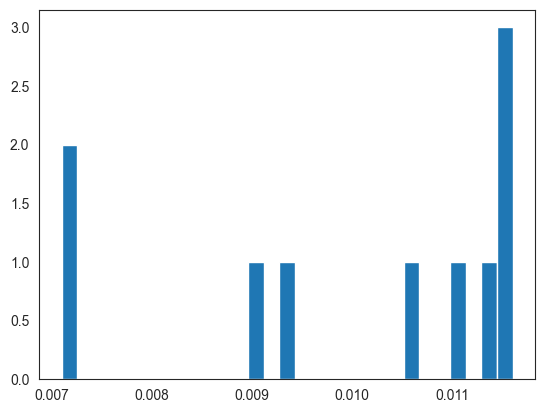

In [ ]:
#print(max(Metallicity))

Z_bins=np.linspace(min(location_array[0:10]),max(location_array[0:10]), 30)
counts2,bins2=np.histogram(location_array,bins=Z_bins)
#Z_bins
plt.hist(bins2[:-1],bins2,weights=counts2)

[2 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 3]


C:\Users\Dell\AppData\Local\Temp\ipykernel_14324\3609745922.py:8: RuntimeWarning: invalid value encountered in divide
  plt.hist(Z_bins[:-1],Z_bins,weights=counts*100/counts2)


Text(0.5, 1.0, '$\\alpha$ = $10^{-4}$; $V_{frag}$=300')

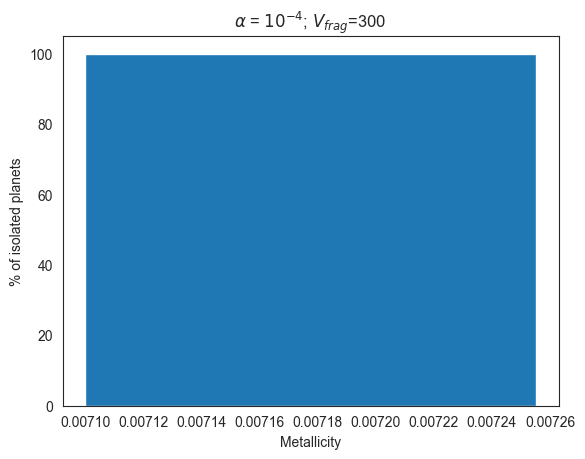

In [ ]:
#X=np.linspace(min(Metallicity,))
        
temp=locations[1][3]
temp=temp[np.nonzero(temp)]
counts,bins= np.histogram(temp,bins=Z_bins)
#print(counts[0:28]/counts2[0:28])
#binsplot = bins[0:28]
plt.hist(Z_bins[:-1],Z_bins,weights=counts*100/counts2)
zcents=0.5*(Z_bins[1:]+Z_bins[:-1])

#Y=np.isfinite(counts*100/counts2)
print(counts)

#plt.step(zcents,counts*100/counts2)
plt.ylabel("% of isolated planets")
plt.xlabel("Metallicity")
plt.title(r"$\alpha$ = $10^{-4}$; $V_{frag}$=300")

In [ ]:
print(min(MStar_list))
print(max(MStar_list))

0.08
2.52


In [ ]:
st=0
eta=1

M_PA = 2.5*10**(-4)*(st/0.1)*(eta/0.002)**3*(MStar_list[i]/MS)*ME